In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 9999)
import matplotlib.pyplot as plt

In [2]:
#import the files
xls = pd.ExcelFile("../Data/IBM Sales Enablement Data Analyst Case Study Interview.xlsx")
livesend_by_date = pd.read_excel(xls, 2)
livesend_by_seller = pd.read_excel(xls, 3)
livesend_by_content = pd.read_excel(xls, 4)

In [3]:
#Calculate the open rate for livesend by date
livesend_by_date['LIVESEND_DATE'] = pd.to_datetime(livesend_by_date['LIVESEND_DATE'])
livesend_by_date = livesend_by_date.groupby(pd.Grouper(key='LIVESEND_DATE',freq='M'))['TOTAL_LIVESENDS','TOTAL_CLIENT_OPENS'].sum().reset_index()
livesend_by_date["OPEN_RATE"]=round((livesend_by_date["TOTAL_CLIENT_OPENS"]/livesend_by_date["TOTAL_LIVESENDS"])*100,2)
livesend_by_date["LIVESEND_DATE"]= pd.to_datetime(livesend_by_date["LIVESEND_DATE"]).dt.date
livesend_by_date

,LIVESEND_DATE,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE
0,2020-01-31,91,43,47.25
1,2020-02-29,269,133,49.44
2,2020-03-31,2388,197,8.25
3,2020-04-30,9801,1217,12.42
4,2020-05-31,4291,646,15.05
5,2020-06-30,3400,200,5.88
6,2020-07-31,7556,382,5.06
7,2020-08-31,4730,618,13.07
8,2020-09-30,7719,552,7.15


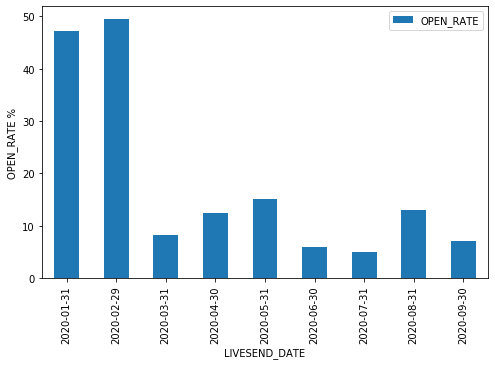

In [4]:
ax=livesend_by_date.plot.bar(x='LIVESEND_DATE',y='OPEN_RATE',figsize=(8,5))
ax.set_ylabel("OPEN_RATE %")
plt.savefig('OPEN_RATE_BY_DATE.png', dpi=300)

In [5]:
#Calculate the open rate for livesend by seller
livesend_by_seller["OPEN RATE"]=round((livesend_by_seller["TOTAL_CLIENT_OPENS"]/livesend_by_seller["TOTAL_LIVESENDS"])*100,2)
livesend_by_seller_mod=livesend_by_seller[['SELLER_ID','TOTAL_LIVESENDS','TOTAL_CLIENT_OPENS','OPEN RATE']]
livesend_by_seller_mod=livesend_by_seller_mod.sort_values("TOTAL_LIVESENDS",ascending=False)
median = livesend_by_seller_mod['TOTAL_LIVESENDS'].median()
mean = round(livesend_by_seller_mod['TOTAL_LIVESENDS'].mean(),2)
#livesend_by_seller_mod.to_csv('livesend_by_seller_mod.csv',index=False,)
livesend_by_seller_mod

,SELLER_ID,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN RATE
358,1f1cbc4f-1ed3-4767-b573-c265de03e37a,3126,18,0.58
864,c9304d02-fda5-49fb-bae8-395d25300f7e,2885,4,0.14
21,67e0e6e0-ba6d-4d38-8a0e-680bfef37d35,2380,49,2.06
27,3ec24363-7e36-4654-8845-765f60e265ca,937,21,2.24
981,509dd3b9-ecfa-4ca1-86fc-fbb8ad6c81b5,830,0,0.00
1489,13917081-c9ff-469c-bc25-ef2e7de95610,786,2,0.25
942,a84aca09-89dc-4210-8062-705efc590f2d,694,0,0.00
457,917a4b3d-2295-4cac-abc1-20b0af123c2d,660,19,2.88
96,e35046f7-ff3c-4d2f-8fff-c6c250868998,578,6,1.04
385,2843b96c-cfbb-4db6-8b02-8fc85017b82e,510,0,0.00


In [6]:
#Calculate the open rate for livesend by content
livesend_by_content["OPEN RATE"]=round((livesend_by_content["TOTAL_CLIENT_OPENS"]/livesend_by_content["TOTAL_LIVESENDS"])*100,2)
livesend_by_content_mod=livesend_by_content[['SEISMIC_DOC_ID','SEISMIC_DOC_NAME','TOTAL_LIVESENDS','TOTAL_CLIENT_OPENS','OPEN RATE','CONTENT_TYPE']]
livesend_by_content_mod=livesend_by_content_mod.sort_values("TOTAL_LIVESENDS",ascending=True)
median=livesend_by_content_mod['TOTAL_LIVESENDS'].median()
mean=livesend_by_content_mod['TOTAL_LIVESENDS'].mean()
median
#livesend_by_content_mod.to_csv('livesend_by_content_mod.csv',index=False,)

1.0

In [7]:
#Calculate the open rate for livesend by content type
livesend_by_content_mod_tl=livesend_by_content_mod.groupby(by="CONTENT_TYPE")['TOTAL_LIVESENDS'].sum().reset_index()
livesend_by_content_mod_op=livesend_by_content_mod.groupby(by="CONTENT_TYPE")['TOTAL_CLIENT_OPENS'].sum().reset_index()
livesend_by_content_mod_tl_df=pd.DataFrame(data=livesend_by_content_mod_tl)
livesend_by_content_mod_op_df=pd.DataFrame(data=livesend_by_content_mod_op)
livesend_by_content_type_merged=pd.merge(left=livesend_by_content_mod_tl_df, 
                                                  right=livesend_by_content_mod_op_df,
                                                  on='CONTENT_TYPE')
livesend_by_content_type_merged["OPEN_RATE"]=round((livesend_by_content_type_merged["TOTAL_CLIENT_OPENS"]/livesend_by_content_type_merged["TOTAL_LIVESENDS"])*100,2)
livesend_by_content_type_merged=livesend_by_content_type_merged.sort_values("OPEN_RATE", ascending=False,ignore_index=True)
#livesend_by_content_type_merged.to_csv('livesend_by_content_type.csv',index=False,)
livesend_by_content_type_merged

,CONTENT_TYPE,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE
0,<NULL>,1,1,100.00
1,FAQ,2,2,100.00
2,Code Patterns,3,3,100.00
3,Sales Kit,9,8,88.89
4,Pricing,9,6,66.67
5,Training/Course,23,13,56.52
6,Other,48,25,52.08
7,Sales Play,4,2,50.00
8,Client Story,6,3,50.00
9,RFP/Proposal,37,17,45.95


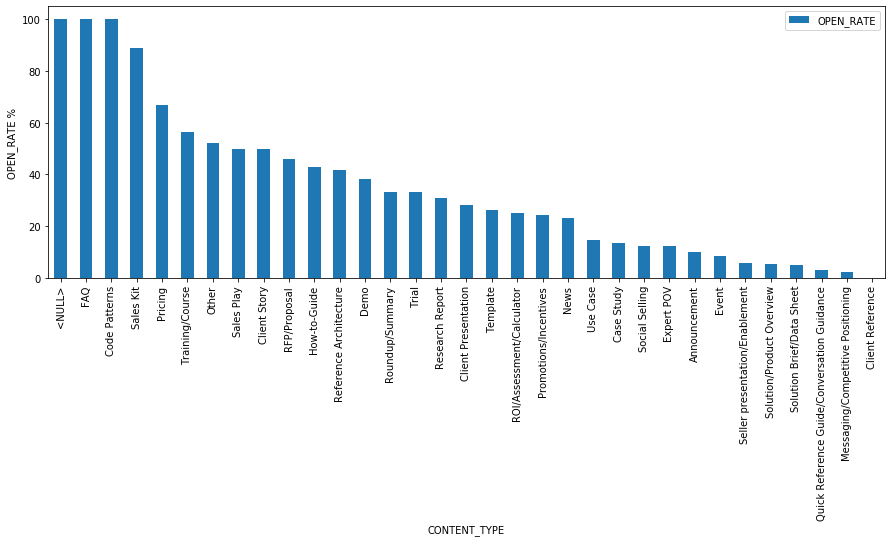

In [8]:
#ax = plt.figure(figsize=(8,8))
ax=livesend_by_content_type_merged.plot.bar(x='CONTENT_TYPE',y='OPEN_RATE',figsize=(15,5))
ax.set_ylabel("OPEN_RATE %")
plt.savefig('OPEN_RATE_BY_CONTENT_TYPE.png', dpi=300)

In [9]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///../seismic_openrate_analysis.sqlite")
conn = engine.connect()

In [11]:
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

[]

In [12]:
indepth_seller_group = pd.read_sql("SELECT sop.SELLER_ID,sop.TOTAL_LIVESENDS,sop.TOTAL_CLIENT_OPENS,sop.OPEN_RATE, s.SELLER_GROUP,s.SELLER_SUBGROUP FROM livesend_by_seller AS s INNER JOIN livesend_by_seller_openrate AS sop ON s.SELLER_ID=sop.SELLER_ID WHERE sop.OPEN_RATE>10.0 AND sop.TOTAL_LIVESENDS>16", conn)
indepth_seller_group=indepth_seller_group.groupby("SELLER_GROUP")
indepth_seller_group.count()

,SELLER_ID,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE,SELLER_SUBGROUP
SELLER_GROUP,,,,,
Cld&DataPltfrm,8,8,8,8,8
Cloud,1,1,1,1,1
GBS,4,4,4,4,4
GLMKT,29,29,29,29,29
GTS,2,2,2,2,2
SYS,16,16,16,16,16
Security,1,1,1,1,1
Watson Health,4,4,4,4,4


In [13]:
indepth_seller = pd.read_sql("SELECT SELLER_ID, TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE FROM livesend_by_seller_openrate WHERE OPEN_RATE>=0 AND TOTAL_LIVESENDS>2", conn)
indepth_seller.groupby("OPEN_RATE").count()


,SELLER_ID,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS
OPEN_RATE,,,
0.00,241,241,241
0.14,1,1,1
0.25,1,1,1
0.27,2,2,2
0.57,1,1,1
0.58,1,1,1
0.65,2,2,2
0.68,1,1,1
0.88,1,1,1


In [14]:
indepth_content = pd.read_sql("SELECT DOC_NAME, TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE FROM livesend_by_content_openrate WHERE OPEN_RATE>10.0 AND TOTAL_LIVESENDS>20", conn)
indepth_content
indepth_content.to_csv("livesend_by_content.csv", index=False)